In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/dataset_cleaned.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [3]:
df.shape

(311029, 42)

In [ ]:
icmp_df = df[df['protocol_type']=='icmp']

In [66]:
icmp_df = icmp_df.drop(['protocol_type','flag'],axis = 1)
icmp_df.head()

,duration,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
82,0,-1,30,0,0,0,0,0,0,0,...,3,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0
156,0,0,30,0,0,0,0,0,0,0,...,75,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0
406,0,0,30,0,0,0,0,0,0,0,...,98,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0
629,0,0,30,0,0,0,0,0,0,0,...,120,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0
767,0,-1,30,0,0,0,0,0,0,0,...,2,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0


In [69]:
icmp_df.shape

(164969, 40)

In [5]:
features = ["duration","service","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count"]
target = "result"

In [6]:
classes=np.unique(icmp_df[target])
print(classes)

['ipsweep.' 'multihop.' 'normal.' 'pod.' 'saint.' 'satan.' 'smurf.'
 'snmpguess.']





# Label Encoding

In [7]:
# Here we have replaced normal access requests with 0 and attack with 1

#i==2 is 'normal' in classes and rest all are attacks.

for i in range(len(classes)):
    if i==2:
        icmp_df=icmp_df.replace(classes[i],0)
    else:
        icmp_df=icmp_df.replace(classes[i],1)

In [8]:
# Putting numerical categorical values into string values because sklearn cannot process strings.

icmp_df=icmp_df.replace("eco_i",-1)
icmp_df=icmp_df.replace("ecr_i",0)
icmp_df=icmp_df.replace("tim_i",1)
icmp_df=icmp_df.replace("urp_i",2)

# Difference in features

In [61]:
from sklearn.preprocessing import StandardScaler

new_df = StandardScaler().fit_transform(icmp_df)

In [67]:
new_df = pd.DataFrame(new_df,columns=icmp_df.columns)

In [68]:
new_df

,duration,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0.0,-14.279812,-1.550076,0.0,0.0,-0.02413,0.0,0.0,0.0,0.0,...,-16.503871,-27.654408,0.801285,-27.824874,-0.050238,-0.00978,0.0,-0.016551,0.0,-20.866862
1,0.0,0.035926,-1.550076,0.0,0.0,-0.02413,0.0,0.0,0.0,0.0,...,-11.767631,0.042551,-0.019830,0.042458,-0.050238,-0.00978,0.0,-0.016551,0.0,-20.866862
2,0.0,0.035926,-1.550076,0.0,0.0,-0.02413,0.0,0.0,0.0,0.0,...,-10.254665,0.042551,-0.019830,0.042458,-0.050238,-0.00978,0.0,-0.016551,0.0,-20.866862
3,0.0,0.035926,-1.550076,0.0,0.0,-0.02413,0.0,0.0,0.0,0.0,...,-8.807481,0.042551,-0.019830,0.042458,-0.050238,-0.00978,0.0,-0.016551,0.0,-20.866862
4,0.0,-14.279812,-1.550076,0.0,0.0,-0.02413,0.0,0.0,0.0,0.0,...,-16.569652,-27.654408,0.801285,-27.824874,-0.050238,-0.00978,0.0,-0.016551,0.0,-20.866862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164964,0.0,0.035926,-1.550076,0.0,0.0,-0.02413,0.0,0.0,0.0,0.0,...,-12.425442,0.042551,-0.019830,0.042458,-0.050238,-0.00978,0.0,-0.016551,0.0,-20.866862
164965,0.0,0.035926,-1.550076,0.0,0.0,-0.02413,0.0,0.0,0.0,0.0,...,-12.359661,0.042551,-0.019830,0.042458,-0.050238,-0.00978,0.0,-0.016551,0.0,-20.866862
164966,0.0,0.035926,-1.550076,0.0,0.0,-0.02413,0.0,0.0,0.0,0.0,...,-12.293880,0.042551,-0.019830,0.042458,-0.050238,-0.00978,0.0,-0.016551,0.0,-20.866862
164967,0.0,0.035926,-1.550076,0.0,0.0,-0.02413,0.0,0.0,0.0,0.0,...,-12.030755,0.042551,-0.019830,0.042458,-0.050238,-0.00978,0.0,-0.016551,0.0,-20.866862


In [70]:
new_df = new_df.groupby(icmp_df['result']).mean()
new_df = new_df.transpose()
new_df.columns = ['Normal','Attack']
new_df

,Normal,Attack
duration,0.000000,0.000000
service,0.035926,-0.047796
src_bytes,-0.261263,0.238057
dst_bytes,0.000000,0.000000
land,0.000000,0.000000
wrong_fragment,-0.024130,0.018464
urgent,0.000000,0.000000
hot,0.000000,0.000000
num_failed_logins,0.000000,0.000000
logged_in,0.000000,0.000000


In [71]:
new_df = new_df.loc[['src_bytes','wrong_fragment','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
                     'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                     'dst_host_srv_diff_host_rate','dst_host_serror_rate'
                    ]]

new_df

,Normal,Attack
src_bytes,-0.261263,0.238057
wrong_fragment,-0.024130,0.018464
srv_diff_host_rate,0.020088,-0.013098
dst_host_count,0.066885,-0.065623
dst_host_srv_count,0.072488,-0.059383
dst_host_same_srv_rate,0.042551,-0.027562
dst_host_diff_srv_rate,-0.013814,0.018643
dst_host_same_src_port_rate,0.042458,-0.027285
dst_host_srv_diff_host_rate,-0.050238,0.060397
dst_host_serror_rate,-0.009780,0.008686


In [72]:
new_df = new_df.set_index(pd.Index(['SB','WF','SDHR','DHC','DHSR','DHSSR','DHDSR','DHSSPR','DHSDHR','DHSR'])) 
new_df.index

Index(['SB', 'WF', 'SDHR', 'DHC', 'DHSR', 'DHSSR', 'DHDSR', 'DHSSPR', 'DHSDHR',
       'DHSR'],
      dtype='object')

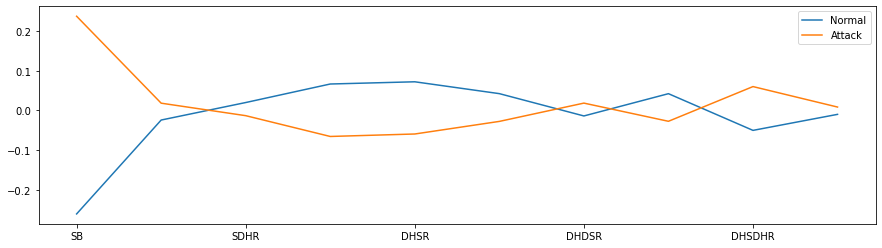

In [73]:
new_df.plot(figsize=(15,4),x_compat = True)



# Heatmap to demonstrate correlation between various features

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(icmp_df[features].corr(), annot=True,cmap="RdBu")
plt.plot()

In [ ]:
X = icmp_df[features]
y = icmp_df[target]
X.head()






# Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.3)

In [ ]:
models = [('Logistic Regression',LogisticRegression(solver='liblinear')), 
          ('KNN Classifier',KNeighborsClassifier(n_neighbors=3)),
          ('MLP Classifer',MLPClassifier(alpha=0.005)),
          ('Decision Tree Classifier',DecisionTreeClassifier(random_state=3)),
          ('Random Forest Classfier',RandomForestClassifier(random_state=3))
         ]

scores=list()

In [ ]:
for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    
    print('\n',name)
    print('---------------------------------')
    print("Accuracy of the model is: ", score)
    
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("*=============================================================*")

# Final Results

In [ ]:
classifiers = [name for name,_ in models]
plt.figure(figsize=(12,4))
plt.plot(classifiers,scores)
plt.title("ICMP Attack Detection Scores")
plt.ylim(99.75,100)
plt.show()